In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score

In [29]:
attributes = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
cleveland = pd.read_csv('processed.cleveland.csv', names=attributes).replace('?', None)
hungarian = pd.read_csv('processed.hungarian.csv', names=attributes).replace('?', None)
switzerland = pd.read_csv('processed.switzerland.csv', names=attributes).replace('?', None)
va = pd.read_csv('processed.va.csv', names=attributes).replace('?', None)

In [30]:
print("\nCleveland:")
print(cleveland.isnull().sum())
print("\nHungarian: ")
print(hungarian.isnull().sum())
print("\nSwitzerland: ")
print(switzerland.isnull().sum())
print("\nVA Long Beach: ")
print(va.isnull().sum())


Cleveland:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Hungarian: 
age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64

Switzerland: 
age           0
sex           0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
target        0
dtype: int64

VA Long Beach: 
age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
target        0
dtype: int64


In [36]:
cleveland = cleveland.dropna()

In [68]:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


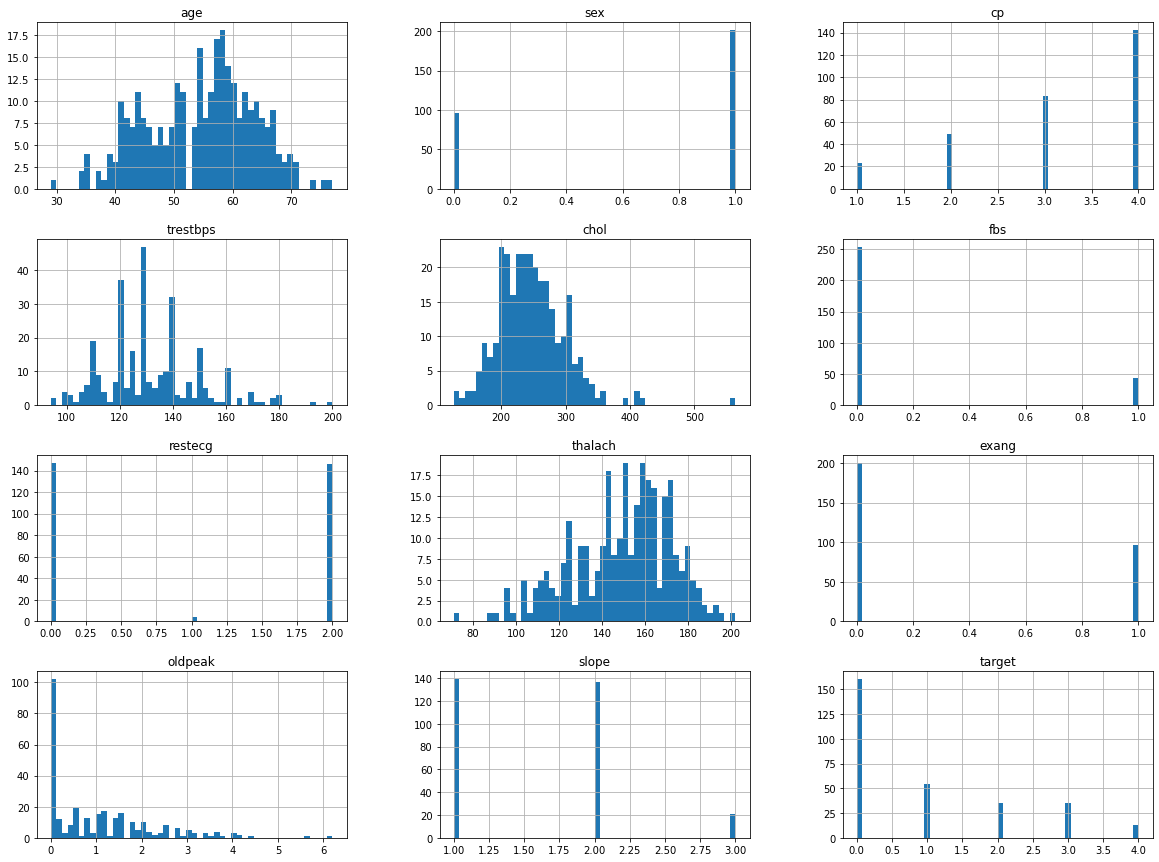

In [69]:
cleveland.hist(bins=50, figsize=(20,15))
plt.show()

In [71]:
heart = pd.read_csv('heart.csv')
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


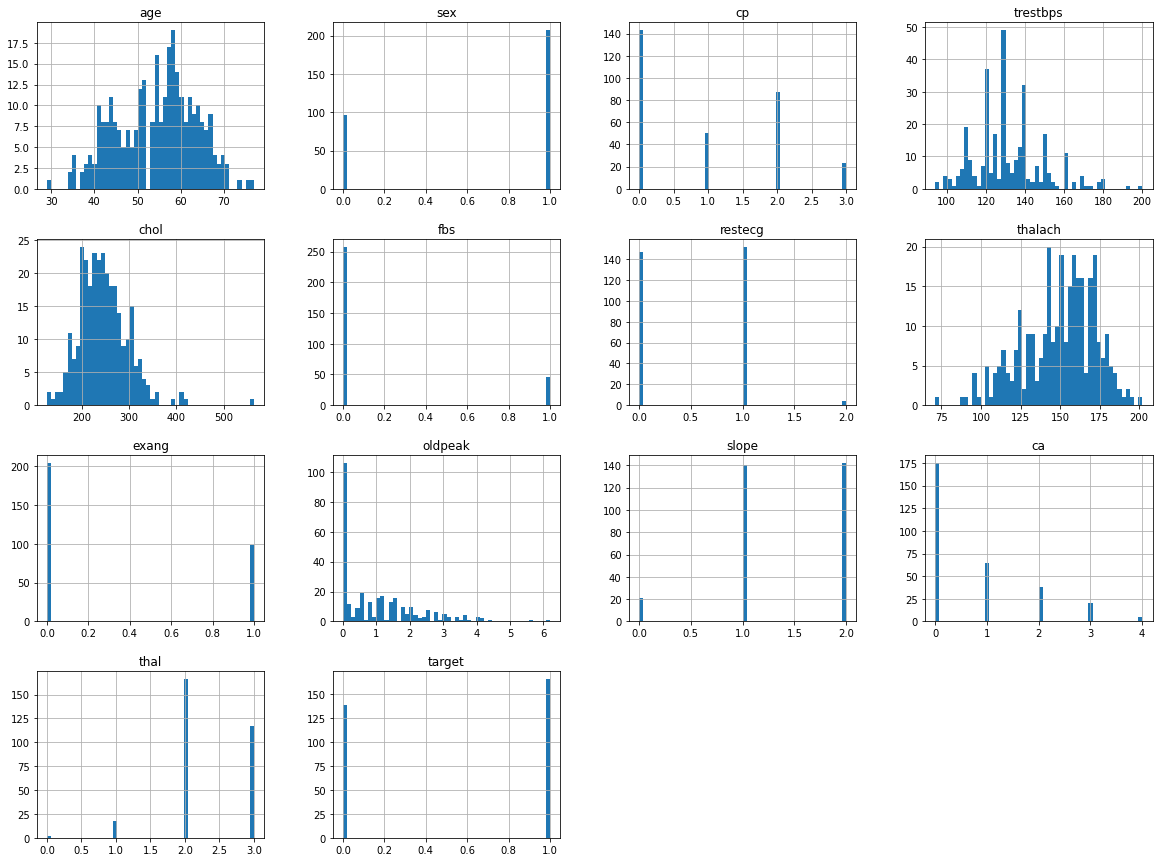

In [86]:
heart.hist(bins=50, figsize=(20,15))
plt.show()

In [87]:
heart.corr()["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [250]:
x = heart.loc[:, heart.columns != 'target']
y = heart.target

x = pd.get_dummies(heart, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']).drop(['target'], axis=1)
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [251]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

## Decision  Regressor

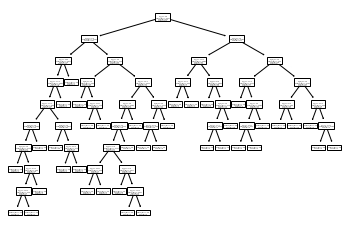

In [252]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(x_train, y_train)
plot_tree(dtr, class_names=test.columns)
y_pred = dtr.predict(x_test)

In [253]:
y_pred = dtr.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Feature Importance: ", pd.DataFrame(dtr.feature_importances_, index=x_train.columns))
print("Accuracy: ", accuracy_score(y_test, y_pred))

MSE:  0.29508196721311475
Feature Importance:                    0
age        0.059271
trestbps   0.105483
chol       0.092070
thalach    0.044633
oldpeak    0.064354
sex_0      0.000000
sex_1      0.046332
cp_0       0.311625
cp_1       0.000000
cp_2       0.000000
cp_3       0.000000
fbs_0      0.012313
fbs_1      0.000000
restecg_0  0.017151
restecg_1  0.000000
restecg_2  0.000000
exang_0    0.100855
exang_1    0.000000
slope_0    0.015397
slope_1    0.000000
slope_2    0.000000
ca_0       0.086802
ca_1       0.000000
ca_2       0.010711
ca_3       0.010261
ca_4       0.000000
thal_0     0.000000
thal_1     0.000000
thal_2     0.000000
thal_3     0.022742
Accuracy:  0.7049180327868853


In [156]:
depth = []
for i in range(1,20):
    dtr = DecisionTreeRegressor(max_depth=i)
    scores = cross_val_score(estimator=dtr, X=x, y=y, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(1, 0.02229515274049122), (2, 0.026933087256427977), (3, 0.030541555513821317), (4, 0.018451529672043877), (5, 0.017010959944349223), (6, 0.01767430439126828), (7, 0.00277777777777779), (8, 0.016666666666666673), (9, 0.00277777777777779), (10, 0.03055555555555557), (11, 0.00277777777777779), (12, 0.016666666666666673), (13, 0.03055555555555557), (14, 0.00277777777777779), (15, 0.03055555555555557), (16, 0.016666666666666673), (17, 0.00277777777777779), (18, 0.016666666666666673), (19, 0.016666666666666673)]


In [157]:
split = []
for i in range(2,20):
    dtr = DecisionTreeRegressor(min_samples_split=i)
    scores = cross_val_score(estimator=dtr, X=x, y=y, cv=10, n_jobs=4)
    split.append((i,scores.mean()))
print(split)

[(2, 0.00277777777777779), (3, 0.027083333333333348), (4, 0.01512345679012348), (5, 0.01512345679012348), (6, 0.011666666666666691), (7, 0.017743055555555574), (8, 0.011666666666666691), (9, 0.011666666666666691), (10, 0.005322359396433485), (11, 0.011111111111111127), (12, 0.012947658402203865), (13, 0.012947658402203865), (14, 0.012947658402203865), (15, 0.012805935046194806), (16, 0.014561368165264276), (17, 0.017336252424523545), (18, 0.017336252424523545), (19, 0.02156464748625193)]


In [158]:
leaf = []
for i in range(2,20):
    dtr = DecisionTreeRegressor(min_samples_leaf=i)
    scores = cross_val_score(estimator=dtr, X=x, y=y, cv=10, n_jobs=4)
    leaf.append((i,scores.mean()))
print(leaf)

[(2, 0.0012345679012345846), (3, 0.012160493827160501), (4, 0.018333333333333347), (5, 0.018408779149519904), (6, 0.015896399991780896), (7, 0.014757366395259763), (8, 0.017818768039250688), (9, 0.019485220371212288), (10, 0.02008535754542353), (11, 0.020181776278205898), (12, 0.024827992914475416), (13, 0.025362838410859366), (14, 0.025362838410859366), (15, 0.023509698615454398), (16, 0.023509698615454398), (17, 0.02737840443269427), (18, 0.02956561747218004), (19, 0.00943155455472433)]


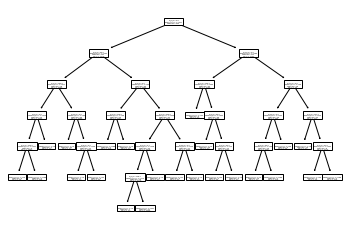

In [254]:
dtr = DecisionTreeRegressor(max_depth=6, min_samples_split=4, min_samples_leaf=4)
dtr.fit(x_train, y_train)
plot_tree(dtr, class_names=test.columns)
y_pred = dtr.predict(x_test)

In [255]:
y_pred = dtr.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Feature Importance: ", pd.DataFrame(dtr.feature_importances_, index=x_train.columns))
print("Accuracy: ", accuracy_score(y_test, np.rint(y_pred)))

MSE:  0.20602459016393443
Feature Importance:                    0
age        0.081009
trestbps   0.013267
chol       0.043752
thalach    0.050209
oldpeak    0.051064
sex_0      0.011800
sex_1      0.059770
cp_0       0.402011
cp_1       0.010067
cp_2       0.000000
cp_3       0.000000
fbs_0      0.000000
fbs_1      0.000000
restecg_0  0.000000
restecg_1  0.000000
restecg_2  0.000000
exang_0    0.000000
exang_1    0.130108
slope_0    0.000000
slope_1    0.009413
slope_2    0.000000
ca_0       0.111979
ca_1       0.000000
ca_2       0.000000
ca_3       0.000000
ca_4       0.000000
thal_0     0.000000
thal_1     0.000000
thal_2     0.000000
thal_3     0.025551
Accuracy:  0.7540983606557377


## Logistic Regression Model

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [171]:
lr = LogisticRegression(random_state=1, max_iter=10000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, np.rint(y_pred)))

MSE:  0.21311475409836064
Accuracy:  0.7868852459016393


In [245]:
lr = LogisticRegressionCV(cv=10, random_state=1, max_iter=10000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, np.rint(y_pred)))

MSE:  0.19672131147540983
Accuracy:  0.8032786885245902


# Random Forest Classification

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, np.rint(y_pred)))
print("Feature Importance: ", pd.DataFrame(rfc.feature_importances_, index=x_train.columns))

MSE:  0.21311475409836064
Accuracy:  0.7868852459016393
Feature Importance:                    0
age        0.063556
trestbps   0.057014
chol       0.061227
thalach    0.094712
oldpeak    0.096907
sex_0      0.023860
sex_1      0.026861
cp_0       0.107614
cp_1       0.011294
cp_2       0.028912
cp_3       0.016456
fbs_0      0.006505
fbs_1      0.007120
restecg_0  0.014585
restecg_1  0.015604
restecg_2  0.001512
exang_0    0.075667
exang_1    0.030762
slope_0    0.005377
slope_1    0.020291
slope_2    0.024683
ca_0       0.062803
ca_1       0.018766
ca_2       0.014564
ca_3       0.005983
ca_4       0.002421
thal_0     0.000875
thal_1     0.004542
thal_2     0.063536
thal_3     0.035989


In [199]:
depth = []
for i in range(1,20):
    rfc = RandomForestClassifier(random_state=0, max_depth=i)
    scores = cross_val_score(estimator=rfc, X=x, y=y, cv=10, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)
# depth seems irrelevant

[(1, 0.8218279569892474), (2, 0.841505376344086), (3, 0.8447311827956989), (4, 0.8348387096774192), (5, 0.8251612903225807), (6, 0.8447311827956989), (7, 0.8347311827956989), (8, 0.8313978494623656), (9, 0.8316129032258065), (10, 0.8280645161290323), (11, 0.844516129032258), (12, 0.8378494623655914), (13, 0.8411827956989247), (14, 0.8379569892473118), (15, 0.8379569892473118), (16, 0.8379569892473118), (17, 0.8379569892473118), (18, 0.8379569892473118), (19, 0.8379569892473118)]


In [196]:
split = []
for i in range(2,20):
    rfc = RandomForestClassifier(min_samples_split=i)
    scores = cross_val_score(estimator=rfc, X=x, y=y, cv=10, n_jobs=4)
    split.append((i,scores.mean()))
print(split)

[(2, 0.8248387096774193), (3, 0.8212903225806452), (4, 0.8349462365591398), (5, 0.8478494623655914), (6, 0.8348387096774192), (7, 0.8281720430107526), (8, 0.8248387096774193), (9, 0.8447311827956989), (10, 0.8382795698924731), (11, 0.8380645161290323), (12, 0.8413978494623656), (13, 0.8349462365591398), (14, 0.8447311827956989), (15, 0.831505376344086), (16, 0.8346236559139785), (17, 0.8316129032258065), (18, 0.8413978494623656), (19, 0.831505376344086)]


In [197]:
leaf = []
for i in range(2,20):
    rfc = RandomForestClassifier(min_samples_leaf=i)
    scores = cross_val_score(estimator=rfc, X=x, y=y, cv=10, n_jobs=4)
    leaf.append((i,scores.mean()))
print(leaf)

[(2, 0.8381720430107527), (3, 0.8479569892473118), (4, 0.8513978494623655), (5, 0.8382795698924731), (6, 0.828494623655914), (7, 0.831505376344086), (8, 0.8450537634408603), (9, 0.841505376344086), (10, 0.8482795698924731), (11, 0.8351612903225807), (12, 0.8350537634408604), (13, 0.828494623655914), (14, 0.8318279569892473), (15, 0.8317204301075268), (16, 0.8250537634408601), (17, 0.8351612903225807), (18, 0.841505376344086), (19, 0.8351612903225807)]


In [260]:
rfc = RandomForestClassifier(max_depth=1, min_samples_split=3, min_samples_leaf=6)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, np.rint(y_pred)))

MSE:  0.18032786885245902
Accuracy:  0.819672131147541


In [262]:
rfc = RandomForestClassifier(max_depth=5, min_samples_split=3, min_samples_leaf=6, bootstrap=True)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, np.rint(y_pred)))

MSE:  0.19672131147540983
Accuracy:  0.8032786885245902


# Naive Bayes

In [203]:
from sklearn.naive_bayes import GaussianNB

In [204]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, np.rint(y_pred)))

MSE:  0.22950819672131148
Accuracy:  0.7704918032786885


# Feature Importance

<AxesSubplot:>

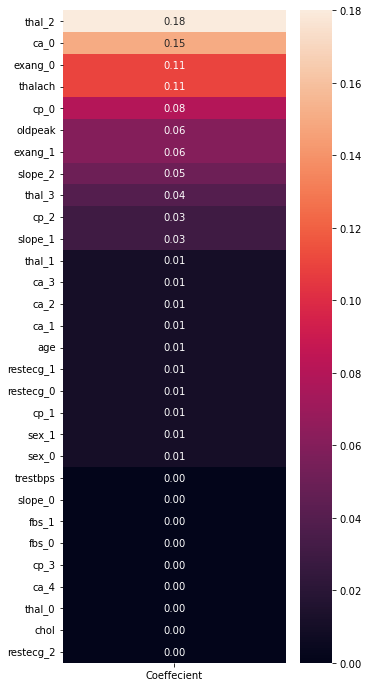

In [257]:
import seaborn as sns
plt.figure(figsize=(5,12))
coef = pd.DataFrame(dtr.feature_importances_.ravel(), x_train.columns)
coef.columns = ['Coeffecient']
coef.sort_values(by=['Coeffecient'], inplace=True)
sns.heatmap(coeffecients, annot=True, fmt='.2f')

## Combine Datasets and Matrix Completion

In [205]:
from sklearn.impute import SimpleImputer

In [206]:
heart_all = pd.concat([cleveland, hungarian, switzerland, va])
heart_all.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          607
thal        484
target        0
dtype: int64

In [207]:
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(cleveland)
heart_all_cmpl = imp_mean.transform(heart_all)

In [208]:
heart_all

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127,333,1,1,154,0,0,None,None,None,1
196,62.0,1.0,1.0,None,139,0,1,None,None,None,None,None,None,0
197,55.0,1.0,4.0,122,223,1,1,100,0,0,None,None,6,2
198,58.0,1.0,4.0,None,385,1,2,None,None,None,None,None,None,0


In [224]:
heart_all_cmpl = pd.DataFrame(heart_all_cmpl, columns=heart_all.columns)
heart_all_cmpl

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.000000,233.0,1.0,2.0,150.000000,0.000000,2.300000,3.000000,0.000000,6.00000,0.0
1,67.0,1.0,4.0,160.000000,286.0,0.0,2.0,108.000000,1.000000,1.500000,2.000000,3.000000,3.00000,2.0
2,67.0,1.0,4.0,120.000000,229.0,0.0,2.0,129.000000,1.000000,2.600000,2.000000,2.000000,7.00000,1.0
3,37.0,1.0,3.0,130.000000,250.0,0.0,0.0,187.000000,0.000000,3.500000,3.000000,0.000000,3.00000,0.0
4,41.0,0.0,2.0,130.000000,204.0,0.0,2.0,172.000000,0.000000,1.400000,1.000000,0.000000,3.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.000000,0.000000,1.602694,0.676768,4.73064,1.0
910,62.0,1.0,1.0,131.693603,139.0,0.0,1.0,149.599327,0.326599,1.055556,1.602694,0.676768,4.73064,0.0
911,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,1.602694,0.676768,6.00000,2.0
912,58.0,1.0,4.0,131.693603,385.0,1.0,2.0,149.599327,0.326599,1.055556,1.602694,0.676768,4.73064,0.0


In [233]:
x_cmpl = heart_all_cmpl.loc[:, heart.columns != 'target']
y_cmpl = heart_all_cmpl.target

x_cmpl = pd.get_dummies(heart_all_cmpl, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']).drop(['target'], axis=1)

In [234]:
x_train_cmpl, x_test_cmpl, y_train_cmpl, y_test_cmpl = train_test_split(x_cmpl, y_cmpl, test_size=0.2, random_state = 1)

In [235]:
dtr_cmpl = DecisionTreeRegressor(random_state=0)
dtr_cmpl.fit(x_train_cmpl, y_train_cmpl)
y_pred_cmpl = dtr_cmpl.predict(x_test_cmpl)
print("MSE: ", mean_squared_error(y_test_cmpl, y_pred_cmpl))
print("Accuracy: ", accuracy_score(y_test_cmpl, y_pred_cmpl))

MSE:  1.6010928961748634
Accuracy:  0.44808743169398907


In [236]:
lr_cmpl = LogisticRegressionCV(cv=10, random_state=1, max_iter=10000)
lr_cmpl.fit(x_train_cmpl, y_train_cmpl)
y_pred_cmpl = lr_cmpl.predict(x_test_cmpl)
print("MSE: ", mean_squared_error(y_test_cmpl, y_pred_cmpl))
print("Accuracy: ", accuracy_score(y_test_cmpl, np.rint(y_pred_cmpl)))

MSE:  1.092896174863388
Accuracy:  0.6120218579234973


In [237]:
rfc_cmpl = RandomForestClassifier(max_depth=1, min_samples_split=3, min_samples_leaf=6)
rfc_cmpl.fit(x_train_cmpl, y_train_cmpl)
y_pred_cmpl = rfc_cmpl.predict(x_test_cmpl)
print("MSE: ", mean_squared_error(y_test_cmpl, y_pred_cmpl))
print("Accuracy: ", accuracy_score(y_test_cmpl, np.rint(y_pred_cmpl)))

MSE:  1.5901639344262295
Accuracy:  0.5628415300546448


In [238]:
nb_cmpl = GaussianNB()
nb_cmpl.fit(x_train_cmpl, y_train_cmpl)
y_pred_cmpl = nb_cmpl.predict(x_test_cmpl)
print("MSE: ", mean_squared_error(y_test_cmpl, y_pred_cmpl))
print("Accuracy: ", accuracy_score(y_test_cmpl, np.rint(y_pred_cmpl)))

MSE:  2.2950819672131146
Accuracy:  0.4207650273224044
